# Data Analysis

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

In [263]:
dtypes = {'label': int}

In [264]:
excel_file = 'complete_dataset.xlsx'
csv_file = 'complete_dataset.csv'

# Lese die Excel-Datei in einen Pandas DataFrame ein
df_excel = pd.read_excel(excel_file)

# Lösche Zeilen, in denen die Spalte "label" leer ist
df_excel = df_excel.dropna(subset=['label'])

# Konvertiere die dritte Spalte ("label") in den Integer-Datentyp
df_excel['label'] = df_excel['label'].astype(int)

# Schreibe den DataFrame in eine CSV-Datei
df_excel.to_csv(csv_file, index=False)

df = pd.read_csv(csv_file, usecols=range(3), dtype=dtypes)

In [265]:
df.head(10)

,comment,source,label
0,As a woman you shouldn't complain about cleani...,kaggle,0
1,boy dats cold...tyga dwn bad for cuffin dat ho...,kaggle,1
2,Dawg!!!! You ever fuck a bitch and she start t...,kaggle,1
3,The shit you hear about me might be true or it...,kaggle,1
4,The shit just blows me..claim you so faithful ...,kaggle,1
5,I can not just sit up and HATE on another bitc...,kaggle,1
6,you might not get ya bitch back thats that,kaggle,1
7,":hobbies include: fighting Mariam"" bitch",kaggle,1
8,Keeks is a bitch she curves everyone lol I wal...,kaggle,1
9,Murda Gang bitch its Gang Land,kaggle,1


In [266]:
print("Count of rows in the dataset:", df.shape[0])

Count of rows in the dataset: 3862


### Exploratory Analysis 

In [267]:
# count the number of each characteristic of 'source'
source_counts = df['source'].value_counts()

# count the number of each characteristic of 'label'
label_counts = df['label'].value_counts()

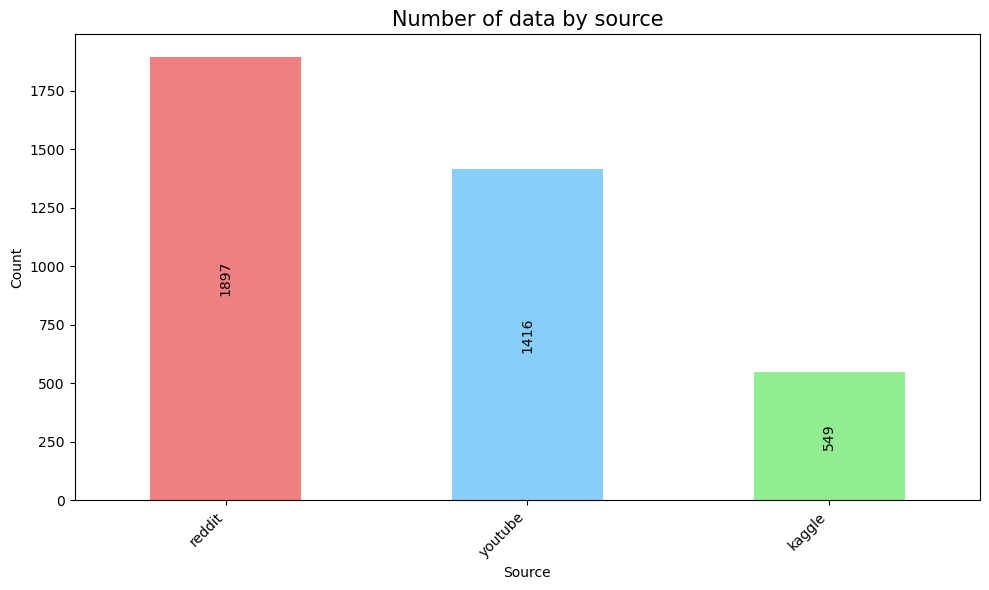

In [268]:
plt.figure(figsize=(10, 6))
bars = source_counts.plot(kind='bar', color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Number of data by source', fontsize=15)
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, height, ha='center', va='center', rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

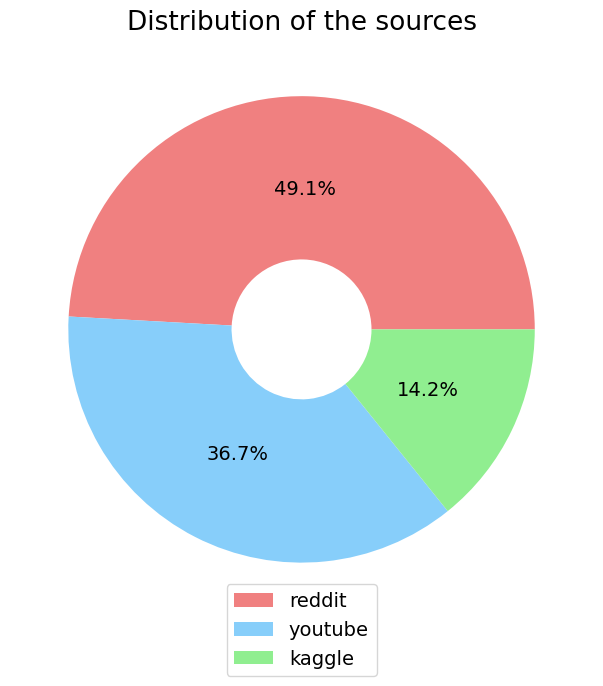

In [269]:
plt.figure(figsize=(7, 7))
patches, texts, autotexts = plt.pie(source_counts, labels=None, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'], wedgeprops=dict(width=0.7))
plt.title('Distribution of the sources', fontsize=19)  # Überschriftsgröße geändert
plt.ylabel('')

for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_fontsize(14)

plt.legend(source_counts.index, loc='upper center', bbox_to_anchor=(0.5, 0.08), fontsize=14)
plt.tight_layout()
plt.show()

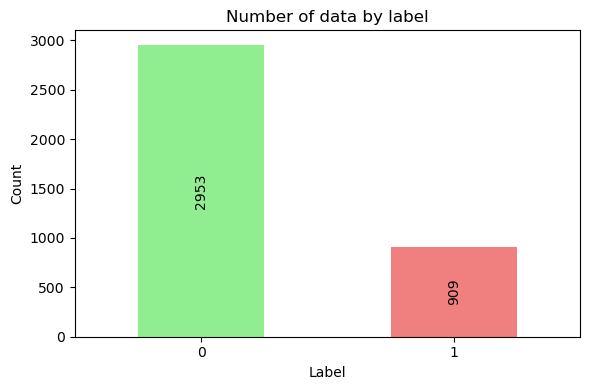

In [270]:
plt.figure(figsize=(6, 4))
bars = label_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Number of data by label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Beschriftung der Säulen mit der Anzahl
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, height, ha='center', va='center', rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

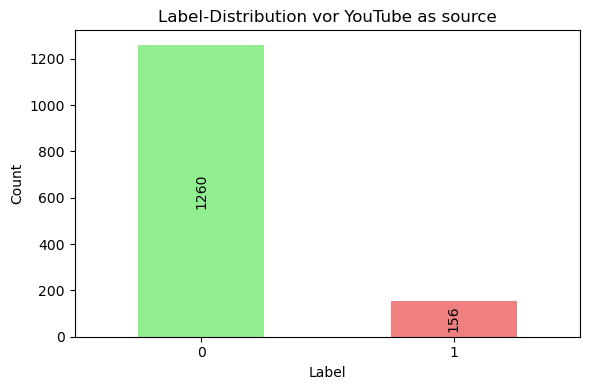

In [271]:
# Filtere den DataFrame nach der Quelle 'youtube'
youtube_df = df[df['source'] == 'youtube']

# Zähle die Häufigkeit jeder Ausprägung von 'label' für 'youtube'
youtube_label_counts = youtube_df['label'].value_counts()

# Erstelle ein Säulendiagramm der Verteilung der verschiedenen Ausprägungen von 'label' für 'youtube'
plt.figure(figsize=(6, 4))
bars = youtube_label_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Label-Distribution vor YouTube as source')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Beschriftung der Säulen mit der Anzahl innerhalb der Säulen
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, height, ha='center', va='center', rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

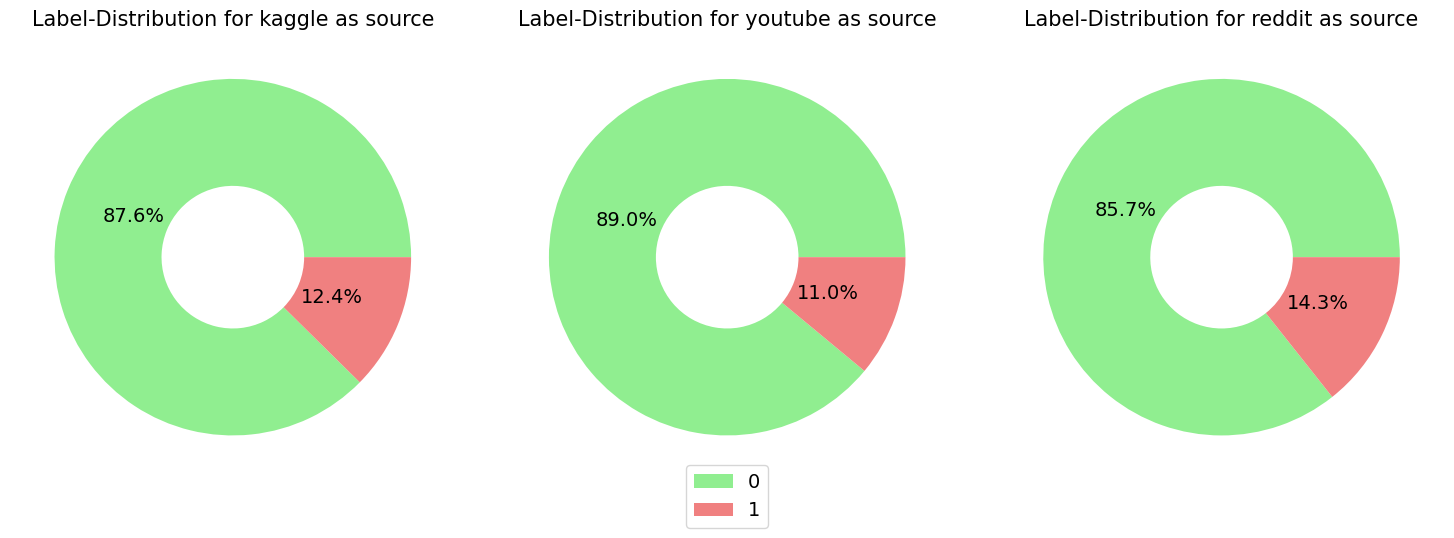

In [272]:
# Erstelle eine Figur mit drei Subplots für die Kreisdiagramme
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iteriere über die verschiedenen Quellen und erstelle Kreisdiagramme für die Label-Verteilung
for i, source in enumerate(df['source'].unique()):
    # Filtere den DataFrame nach der aktuellen Quelle
    source_df = df[df['source'] == source]
    
    # Zähle die Häufigkeit jeder Ausprägung von 'label' für die aktuelle Quelle
    label_counts = source_df['label'].value_counts()
    
    # Erstelle ein Kreisdiagramm für die Verteilung der Labels
    ax = axes[i]
    patches, texts, autotexts = ax.pie(label_counts, labels=None, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], wedgeprops=dict(width=0.6))
    ax.set_title(f'Label-Distribution for {source} as source', fontsize=15)
    ax.set_ylabel('')
    
    # Zentriere die Prozentangaben in ihren Teilen
    for autotext in autotexts:
        autotext.set_horizontalalignment('center')
        autotext.set_fontsize(14)


leg = fig.legend(label_counts.index, loc='upper center', bbox_to_anchor=(0.5, 0.08), fontsize=14)
plt.subplots_adjust(bottom=0.2)

# Stelle sicher, dass die Subplots ordentlich angezeigt werden
plt.tight_layout()
plt.show()

In [273]:
# Umbenennen der Spalte 'count' in 'label'
df.rename(columns={'count': 'label'}, inplace=True)

# Überprüfe die Verteilung der Labels insgesamt
print("Gesamte Label-Verteilung:")
print(df['label'].value_counts())

# Iteriere über die verschiedenen Ausprägungen von 'source' und überprüfe die Label-Verteilung
for source in df['source'].unique():
    # Filtere den DataFrame nach der aktuellen Quelle
    source_df = df[df['source'] == source]
    
    # Zähle die Häufigkeit jeder Ausprägung von 'label' für die aktuelle Quelle
    label_counts = source_df['label'].value_counts()
    
    # Überprüfe die Label-Verteilung für die aktuelle Quelle
    print(f"Label-Verteilung für Quelle '{source}':")
    print(label_counts)


Gesamte Label-Verteilung:
label
0    2953
1     909
Name: count, dtype: int64
Label-Verteilung für Quelle 'kaggle':
label
1    481
0     68
Name: count, dtype: int64
Label-Verteilung für Quelle 'youtube':
label
0    1260
1     156
Name: count, dtype: int64
Label-Verteilung für Quelle 'reddit':
label
0    1625
1     272
Name: count, dtype: int64


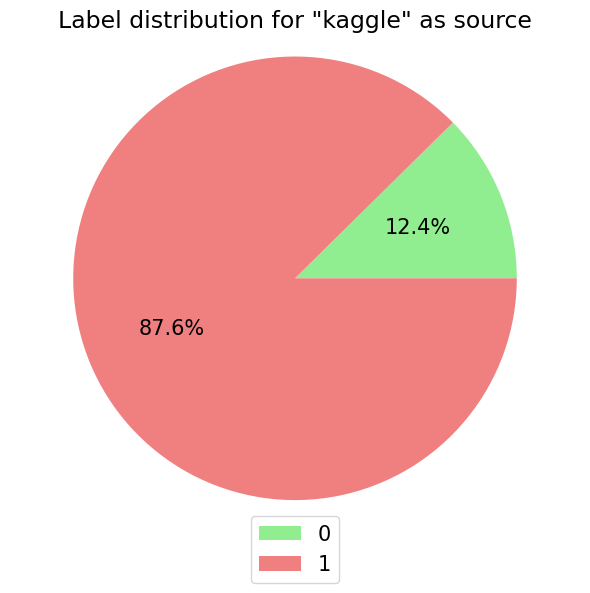

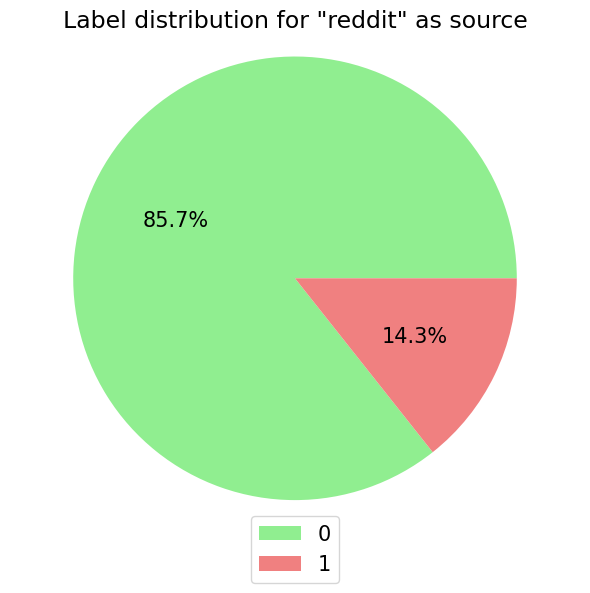

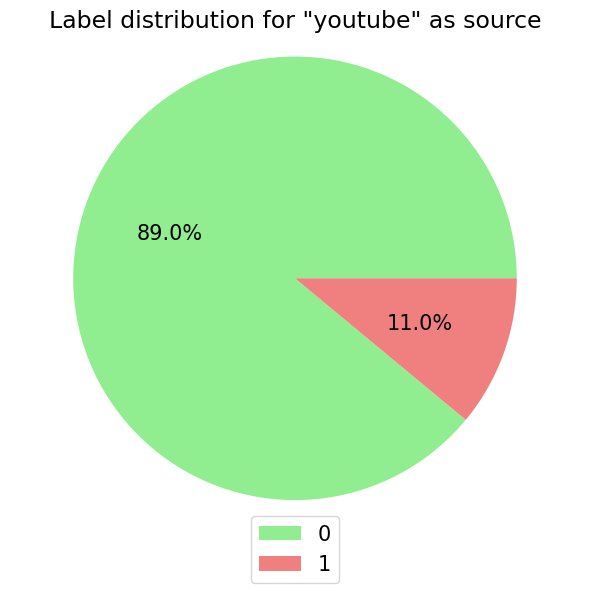

In [291]:
grouped_df = df.groupby(['source', 'label']).size().unstack()

# Erstellen der Kreisdiagramme für jede Quelle
for source in grouped_df.index:
    plt.figure(figsize=(6, 6))
    patches, texts, autotexts = plt.pie(grouped_df.loc[source], labels=None, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title(f'Label distribution for "{source}" as source', fontsize=17)
    plt.legend(grouped_df.columns, loc='lower center', bbox_to_anchor=(0.5, -0.15), fontsize=15)
    plt.axis('equal')  # sorgt dafür, dass das Diagramm kreisförmig ist
    
    # Ändere die Schriftgröße der Prozentangaben
    for autotext in autotexts:
        autotext.set_fontsize(15)
    
    plt.tight_layout()
    plt.show()
